<a href="https://colab.research.google.com/github/omarja12/Market_Risk/blob/main/Project_Market_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> __Practical Assignment: Estimating VAR of a Portfolio.__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ds = pd.read_excel('2122_RM_Data.xlsx')

In [ ]:
omega1 = 0.4 
omega2 = 0.6
beta1 = 1.3
beta2 = 1.6

In [ ]:
ds['Date'] = pd.to_datetime(ds['Date'])

In [ ]:
for c in ['DAX', 'NASDAQ100']:
    ds[c] = ds[c].apply(lambda x: x.replace(',', '')) 

In [ ]:
for c in ['DAX', 'NASDAQ100']:
    ds[c] = pd.to_numeric(ds[c])

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB
0,2022-03-09,13847.93,13742.20,127.0000,120.0000
1,2022-03-08,12831.51,13267.61,118.9925,127.5000
2,2022-03-07,12834.65,13319.38,118.9925,143.0000
3,2022-03-04,13094.54,13837.83,118.9925,122.5375
4,2022-03-03,13698.40,14035.21,117.6000,109.8960


In [ ]:
ds.dtypes

Date         datetime64[ns]
DAX                 float64
NASDAQ100           float64
EUR/RUB             float64
USD/RUB             float64
dtype: object

In [ ]:
# Sorting the dataframe by date.
ds = ds.sort_values(by="Date")

In [ ]:
ds.reset_index(drop=True, inplace=True)

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB
0,2017-02-09,11642.86,5212.16,61.9424,58.9600
1,2017-02-10,11666.97,5226.69,61.4520,58.2219
2,2017-02-13,11774.43,5256.82,60.4012,57.9851
3,2017-02-14,11771.81,5271.07,60.7171,57.1288
4,2017-02-15,11793.93,5302.39,61.4459,57.2565


# Part 1:

## Question 1

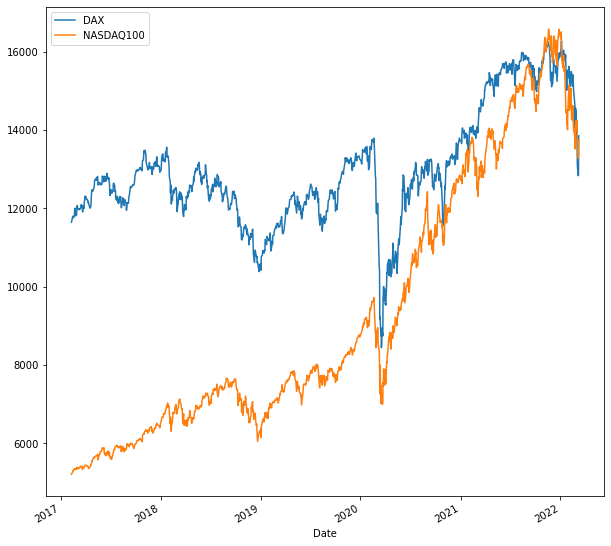

In [ ]:
# Ploting the indexes

ds.plot(x='Date', y=["DAX", "NASDAQ100"], kind="line", figsize=(10, 10))
plt.show()

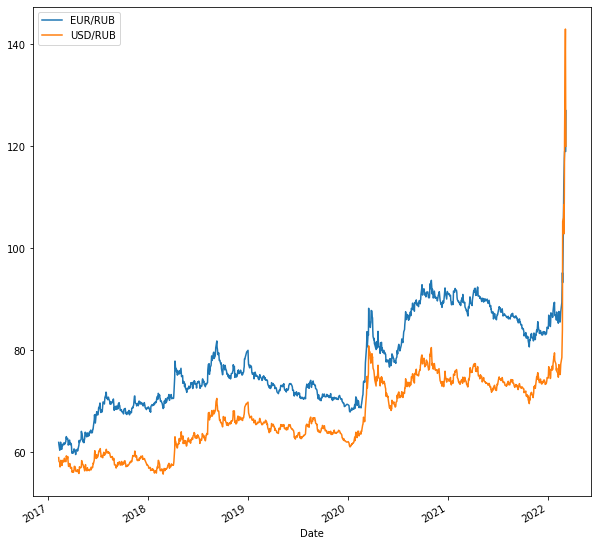

In [ ]:
# Ploting the returns.

ds.plot(x='Date', y=['EUR/RUB', 'USD/RUB'], kind="line", figsize=(10, 10))
plt.show()

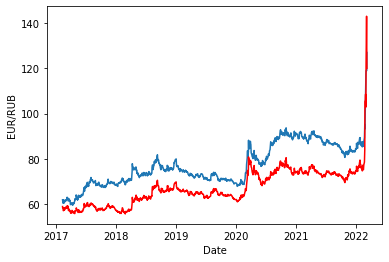

In [ ]:
# See how to add a legend. and how to change the y axis.

fig, ax = plt.subplots()
sns.lineplot(x='Date', y='EUR/RUB', data=ds, ax=ax)
#ax2 = ax.twinx()
sns.lineplot(x='Date', y='USD/RUB', data=ds, ax=ax, color='r')
plt.show()

In [ ]:
# I should be commenting in here.

## Question 2:

In [ ]:
ds['DAX_RUB'] = ds['DAX']*ds['EUR/RUB']
ds['NASDAQ100_RUB'] = ds['NASDAQ100']*ds['USD/RUB']

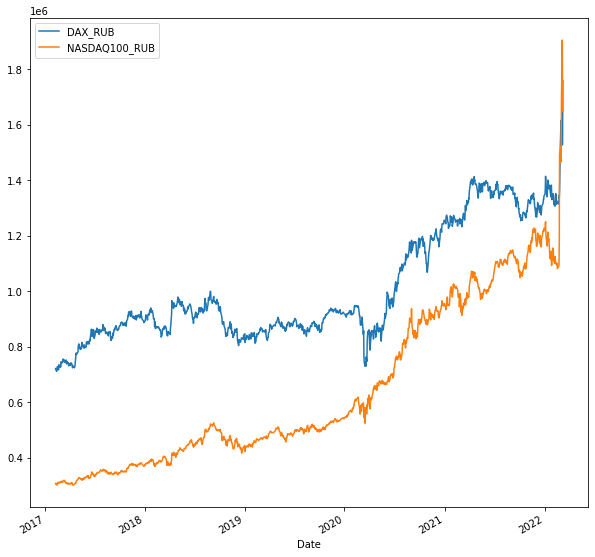

In [ ]:
ds.plot(x='Date', y=["DAX_RUB", "NASDAQ100_RUB"], kind="line", figsize=(10, 10))
plt.show()

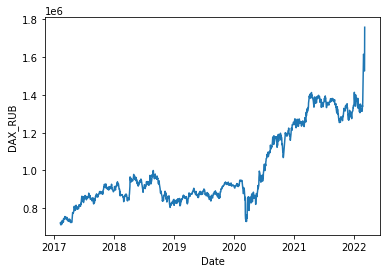

In [ ]:
# See how to add a legend.

fig, ax = plt.subplots()
sns.lineplot(x='Date', y='DAX_RUB', data=ds, ax=ax)
plt.show()

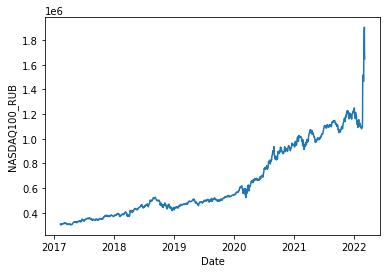

In [ ]:
# See how to add a legend.

fig, ax = plt.subplots()
sns.lineplot(x='Date', y='NASDAQ100_RUB', data=ds, ax=ax)
plt.show()

In [ ]:
## I should comment here again.

## Question 3:

In [ ]:
ds['y_1t'] = np.log1p(ds['DAX'].pct_change())
ds['y_2t'] = np.log1p(ds['NASDAQ100'].pct_change())

In [ ]:
ds['rt_EUR/RUB'] = np.log1p(ds['EUR/RUB'].pct_change())
ds['rt_USD/RUB'] = np.log1p(ds['USD/RUB'].pct_change())

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,rt_USD/RUB
0,2017-02-09,11642.86,5212.16,61.9424,58.9600,721186.691264,307308.953600,NaN,NaN,NaN,NaN
1,2017-02-10,11666.97,5226.69,61.4520,58.2219,716958.640440,304307.822511,0.002069,0.002784,-0.007949,-0.012598
2,2017-02-13,11774.43,5256.82,60.4012,57.9851,711189.701316,304817.233382,0.009168,0.005748,-0.017247,-0.004075
3,2017-02-14,11771.81,5271.07,60.7171,57.1288,714750.164951,301129.903816,-0.000223,0.002707,0.005216,-0.014878
4,2017-02-15,11793.93,5302.39,61.4459,57.2565,724688.643387,303596.293035,0.001877,0.005924,0.011932,0.002233


In [ ]:
ds['Forex_return'] = omega1*ds['rt_EUR/RUB'] + omega2*ds['rt_USD/RUB']

In [ ]:
ds['Equity_return'] = omega1*beta1*ds['y_1t'] + omega2*beta2*ds['y_2t']

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,rt_USD/RUB,Forex_return,Equity_return
0,2017-02-09,11642.86,5212.16,61.9424,58.9600,721186.691264,307308.953600,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-02-10,11666.97,5226.69,61.4520,58.2219,716958.640440,304307.822511,0.002069,0.002784,-0.007949,-0.012598,-0.010738,0.003748
2,2017-02-13,11774.43,5256.82,60.4012,57.9851,711189.701316,304817.233382,0.009168,0.005748,-0.017247,-0.004075,-0.009344,0.010286
3,2017-02-14,11771.81,5271.07,60.7171,57.1288,714750.164951,301129.903816,-0.000223,0.002707,0.005216,-0.014878,-0.006840,0.002483
4,2017-02-15,11793.93,5302.39,61.4459,57.2565,724688.643387,303596.293035,0.001877,0.005924,0.011932,0.002233,0.006112,0.006664


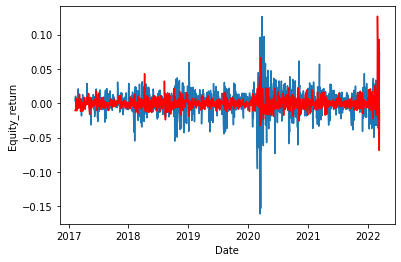

In [ ]:
# See how to add a legend.
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Equity_return', data=ds, ax=ax)
#ax2 = ax.twinx()
sns.lineplot(x='Date', y='Forex_return', data=ds, ax=ax, color='r')
plt.show()

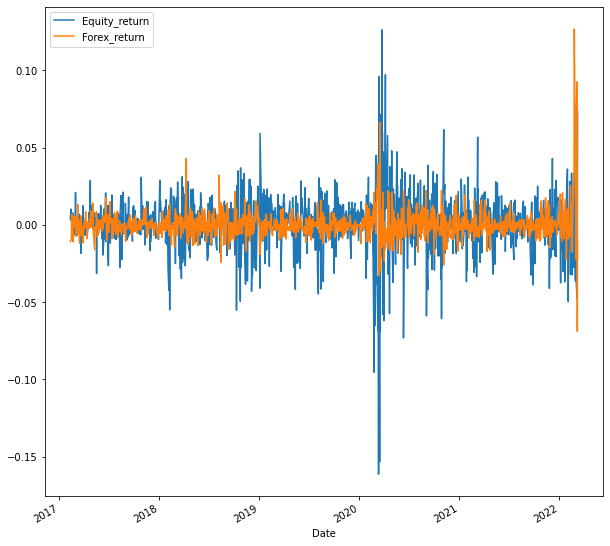

In [ ]:
ds.plot(x='Date', y=["Equity_return", "Forex_return"], kind="line", figsize=(10, 10))
plt.show()

## Question 4:

In [ ]:
# The daily portfolio return is given by:
ds['rt_RUB'] = ds['Equity_return'] + ds['Forex_return']

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,rt_USD/RUB,Forex_return,Equity_return,rt_RUB
0,2017-02-09,11642.86,5212.16,61.9424,58.9600,721186.691264,307308.953600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-02-10,11666.97,5226.69,61.4520,58.2219,716958.640440,304307.822511,0.002069,0.002784,-0.007949,-0.012598,-0.010738,0.003748,-0.006990
2,2017-02-13,11774.43,5256.82,60.4012,57.9851,711189.701316,304817.233382,0.009168,0.005748,-0.017247,-0.004075,-0.009344,0.010286,0.000942
3,2017-02-14,11771.81,5271.07,60.7171,57.1288,714750.164951,301129.903816,-0.000223,0.002707,0.005216,-0.014878,-0.006840,0.002483,-0.004357
4,2017-02-15,11793.93,5302.39,61.4459,57.2565,724688.643387,303596.293035,0.001877,0.005924,0.011932,0.002233,0.006112,0.006664,0.012776


In [ ]:
#ds['rt_RUB'].hist()

<AxesSubplot:xlabel='rt_RUB', ylabel='Count'>

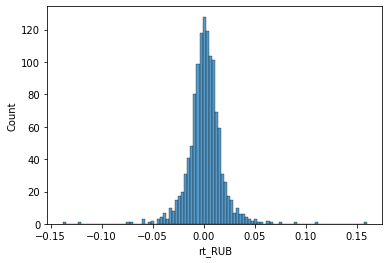

In [ ]:
sns.histplot(data=ds, x='rt_RUB')

In [ ]:
# Commenting the shape of the distribution, the distribution looks like normally distributed which is great.

# Part 2:

In [ ]:
lbd=0.94  

## Question 1:

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,rt_USD/RUB,Forex_return,Equity_return,rt_RUB
0,2017-02-09,11642.86,5212.16,61.9424,58.9600,721186.691264,307308.953600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-02-10,11666.97,5226.69,61.4520,58.2219,716958.640440,304307.822511,0.002069,0.002784,-0.007949,-0.012598,-0.010738,0.003748,-0.006990
2,2017-02-13,11774.43,5256.82,60.4012,57.9851,711189.701316,304817.233382,0.009168,0.005748,-0.017247,-0.004075,-0.009344,0.010286,0.000942
3,2017-02-14,11771.81,5271.07,60.7171,57.1288,714750.164951,301129.903816,-0.000223,0.002707,0.005216,-0.014878,-0.006840,0.002483,-0.004357
4,2017-02-15,11793.93,5302.39,61.4459,57.2565,724688.643387,303596.293035,0.001877,0.005924,0.011932,0.002233,0.006112,0.006664,0.012776


In [ ]:
ds['Equity_return^2'] = ds['Equity_return']*ds['Equity_return']
ds['Forex_return^2'] = ds['Forex_return']*ds['Forex_return']

In [ ]:
ds['Equity_Adjusted_Variance'] = 0
ds['Equity_Adjusted_Variance'].iloc[0] = ds['Equity_return^2'].mean()

In [ ]:
ds['Forex_Adjusted_Variance'] = 0
ds['Forex_Adjusted_Variance'].iloc[0] = ds['Forex_return^2'].mean()

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,rt_USD/RUB,Forex_return,Equity_return,rt_RUB,Equity_return^2,Forex_return^2,Equity_Adjusted_Variance,Forex_Adjusted_Variance
0,2017-02-09,11642.86,5212.16,61.9424,58.9600,721186.691264,307308.953600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00034,0.000091
1,2017-02-10,11666.97,5226.69,61.4520,58.2219,716958.640440,304307.822511,0.002069,0.002784,-0.007949,-0.012598,-0.010738,0.003748,-0.006990,0.000014,0.000115,0.00000,0.000000
2,2017-02-13,11774.43,5256.82,60.4012,57.9851,711189.701316,304817.233382,0.009168,0.005748,-0.017247,-0.004075,-0.009344,0.010286,0.000942,0.000106,0.000087,0.00000,0.000000
3,2017-02-14,11771.81,5271.07,60.7171,57.1288,714750.164951,301129.903816,-0.000223,0.002707,0.005216,-0.014878,-0.006840,0.002483,-0.004357,0.000006,0.000047,0.00000,0.000000
4,2017-02-15,11793.93,5302.39,61.4459,57.2565,724688.643387,303596.293035,0.001877,0.005924,0.011932,0.002233,0.006112,0.006664,0.012776,0.000044,0.000037,0.00000,0.000000


In [ ]:
for i in range(1,ds.shape[0]):
    ds.loc[i, 'Equity_Adjusted_Variance'] = (1-lbd)*ds.loc[i, 'Equity_return^2'] + lbd*ds.loc[i-1, 'Equity_Adjusted_Variance']
    ds.loc[i, 'Forex_Adjusted_Variance'] = (1-lbd)*ds.loc[i, 'Forex_return^2'] + lbd*ds.loc[i-1, 'Forex_Adjusted_Variance']

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,rt_USD/RUB,Forex_return,Equity_return,rt_RUB,Equity_return^2,Forex_return^2,Equity_Adjusted_Variance,Forex_Adjusted_Variance
0,2017-02-09,11642.86,5212.16,61.9424,58.9600,721186.691264,307308.953600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000340,0.000091
1,2017-02-10,11666.97,5226.69,61.4520,58.2219,716958.640440,304307.822511,0.002069,0.002784,-0.007949,-0.012598,-0.010738,0.003748,-0.006990,0.000014,0.000115,0.000321,0.000093
2,2017-02-13,11774.43,5256.82,60.4012,57.9851,711189.701316,304817.233382,0.009168,0.005748,-0.017247,-0.004075,-0.009344,0.010286,0.000942,0.000106,0.000087,0.000308,0.000092
3,2017-02-14,11771.81,5271.07,60.7171,57.1288,714750.164951,301129.903816,-0.000223,0.002707,0.005216,-0.014878,-0.006840,0.002483,-0.004357,0.000006,0.000047,0.000290,0.000090
4,2017-02-15,11793.93,5302.39,61.4459,57.2565,724688.643387,303596.293035,0.001877,0.005924,0.011932,0.002233,0.006112,0.006664,0.012776,0.000044,0.000037,0.000275,0.000087


In [ ]:
ds['Equity_Adjusted Volatility'] = np.sqrt(ds['Equity_Adjusted_Variance'])
ds['Forex_Adjusted Volatility'] = np.sqrt(ds['Forex_Adjusted_Variance'])

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,rt_USD/RUB,Forex_return,Equity_return,rt_RUB,Equity_return^2,Forex_return^2,Equity_Adjusted_Variance,Forex_Adjusted_Variance,Equity_Adjusted Volatility,Forex_Adjusted Volatility
0,2017-02-09,11642.86,5212.16,61.9424,58.9600,721186.691264,307308.953600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000340,0.000091,0.018442,0.009559
1,2017-02-10,11666.97,5226.69,61.4520,58.2219,716958.640440,304307.822511,0.002069,0.002784,-0.007949,-0.012598,-0.010738,0.003748,-0.006990,0.000014,0.000115,0.000321,0.000093,0.017904,0.009633
2,2017-02-13,11774.43,5256.82,60.4012,57.9851,711189.701316,304817.233382,0.009168,0.005748,-0.017247,-0.004075,-0.009344,0.010286,0.000942,0.000106,0.000087,0.000308,0.000092,0.017540,0.009616
3,2017-02-14,11771.81,5271.07,60.7171,57.1288,714750.164951,301129.903816,-0.000223,0.002707,0.005216,-0.014878,-0.006840,0.002483,-0.004357,0.000006,0.000047,0.000290,0.000090,0.017017,0.009473
4,2017-02-15,11793.93,5302.39,61.4459,57.2565,724688.643387,303596.293035,0.001877,0.005924,0.011932,0.002233,0.006112,0.006664,0.012776,0.000044,0.000037,0.000275,0.000087,0.016579,0.009305


In [ ]:
# Now we need to estimate the correlations.

In [ ]:
ds['Return_Product'] = ds['Forex_return']*ds['Equity_return'] 
ds['Return_Product'] = ds['Return_Product'].fillna(0)

In [ ]:
ds['Covariance'] = 0
ds['Covariance'].iloc[0] = ds['Return_Product'].mean()

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,...,Equity_return,rt_RUB,Equity_return^2,Forex_return^2,Equity_Adjusted_Variance,Forex_Adjusted_Variance,Equity_Adjusted Volatility,Forex_Adjusted Volatility,Return_Product,Covariance
0,2017-02-09,11642.86,5212.16,61.9424,58.9600,721186.691264,307308.953600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000340,0.000091,0.018442,0.009559,0.000000,-0.00006
1,2017-02-10,11666.97,5226.69,61.4520,58.2219,716958.640440,304307.822511,0.002069,0.002784,-0.007949,...,0.003748,-0.006990,0.000014,0.000115,0.000321,0.000093,0.017904,0.009633,-0.000040,0.00000
2,2017-02-13,11774.43,5256.82,60.4012,57.9851,711189.701316,304817.233382,0.009168,0.005748,-0.017247,...,0.010286,0.000942,0.000106,0.000087,0.000308,0.000092,0.017540,0.009616,-0.000096,0.00000
3,2017-02-14,11771.81,5271.07,60.7171,57.1288,714750.164951,301129.903816,-0.000223,0.002707,0.005216,...,0.002483,-0.004357,0.000006,0.000047,0.000290,0.000090,0.017017,0.009473,-0.000017,0.00000
4,2017-02-15,11793.93,5302.39,61.4459,57.2565,724688.643387,303596.293035,0.001877,0.005924,0.011932,...,0.006664,0.012776,0.000044,0.000037,0.000275,0.000087,0.016579,0.009305,0.000041,0.00000


In [ ]:
# I still need to verify this equation as I am not sure about it.

for i in range(1,ds.shape[0]):
    ds.loc[i, 'Covariance'] = (1-lbd)*ds.loc[i-1, 'Return_Product'] + lbd*ds.loc[i-1, 'Covariance']   

In [ ]:
ds.head()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,...,Equity_return,rt_RUB,Equity_return^2,Forex_return^2,Equity_Adjusted_Variance,Forex_Adjusted_Variance,Equity_Adjusted Volatility,Forex_Adjusted Volatility,Return_Product,Covariance
0,2017-02-09,11642.86,5212.16,61.9424,58.9600,721186.691264,307308.953600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000340,0.000091,0.018442,0.009559,0.000000,-0.000060
1,2017-02-10,11666.97,5226.69,61.4520,58.2219,716958.640440,304307.822511,0.002069,0.002784,-0.007949,...,0.003748,-0.006990,0.000014,0.000115,0.000321,0.000093,0.017904,0.009633,-0.000040,-0.000057
2,2017-02-13,11774.43,5256.82,60.4012,57.9851,711189.701316,304817.233382,0.009168,0.005748,-0.017247,...,0.010286,0.000942,0.000106,0.000087,0.000308,0.000092,0.017540,0.009616,-0.000096,-0.000056
3,2017-02-14,11771.81,5271.07,60.7171,57.1288,714750.164951,301129.903816,-0.000223,0.002707,0.005216,...,0.002483,-0.004357,0.000006,0.000047,0.000290,0.000090,0.017017,0.009473,-0.000017,-0.000058
4,2017-02-15,11793.93,5302.39,61.4459,57.2565,724688.643387,303596.293035,0.001877,0.005924,0.011932,...,0.006664,0.012776,0.000044,0.000037,0.000275,0.000087,0.016579,0.009305,0.000041,-0.000056


In [ ]:
ds['Correlation'] = ds['Covariance']/(ds['Equity_Adjusted Volatility']*ds['Forex_Adjusted Volatility'])

In [ ]:
ds.tail()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,...,rt_RUB,Equity_return^2,Forex_return^2,Equity_Adjusted_Variance,Forex_Adjusted_Variance,Equity_Adjusted Volatility,Forex_Adjusted Volatility,Return_Product,Covariance,Correlation
1229,2022-03-03,13698.40,14035.21,117.6000,109.8960,1.610932e+06,1.542413e+06,-0.021786,-0.014745,0.018885,...,0.021825,0.000649,0.002238,0.000538,0.001321,0.023188,0.036351,-0.001206,-0.000018,-0.021537
1230,2022-03-04,13094.54,13837.83,118.9925,122.5375,1.558152e+06,1.695653e+06,-0.045084,-0.014163,0.011771,...,0.032998,0.001372,0.004905,0.000588,0.001536,0.024243,0.039197,-0.002594,-0.000089,-0.094079
1231,2022-03-07,12834.65,13319.38,118.9925,143.0000,1.527227e+06,1.904671e+06,-0.020047,-0.038186,0.000000,...,0.045574,0.002217,0.008585,0.000685,0.001959,0.026182,0.044264,-0.004363,-0.000240,-0.206822
1232,2022-03-08,12831.51,13267.61,118.9925,127.5000,1.526853e+06,1.691620e+06,-0.000245,-0.003894,0.000000,...,-0.072703,0.000015,0.004739,0.000645,0.002126,0.025402,0.046110,0.000266,-0.000487,-0.415843
1233,2022-03-09,13847.93,13742.20,127.0000,120.0000,1.758687e+06,1.649064e+06,0.076232,0.035146,0.065127,...,0.063056,0.005385,0.000107,0.000930,0.002005,0.030490,0.044776,-0.000758,-0.000442,-0.323664


In [ ]:
ds.columns

Index(['Date', 'DAX', 'NASDAQ100', 'EUR/RUB', 'USD/RUB', 'DAX_RUB',
       'NASDAQ100_RUB', 'y_1t', 'y_2t', 'rt_EUR/RUB', 'rt_USD/RUB',
       'Forex_return', 'Equity_return', 'rt_RUB', 'Equity_return^2',
       'Forex_return^2', 'Equity_Adjusted_Variance', 'Forex_Adjusted_Variance',
       'Equity_Adjusted Volatility', 'Forex_Adjusted Volatility',
       'Return_Product', 'Covariance', 'Correlation'],
      dtype='object')

## Question 2:

In [ ]:
# Calculating the adjusted portfolios returns, and comparing them with the original ones.

In [ ]:
ds['Adjusted_Equity_return'] = ds['Equity_return'] \
                *(ds['Equity_Adjusted Volatility']/ds.loc[ds.shape[0]-1, 'Equity_Adjusted Volatility'])

In [ ]:
ds['Adjusted_Forex_return'] = ds['Forex_return']*(ds['Forex_Adjusted Volatility']/ds.loc[ds.shape[0]-1, 'Forex_Adjusted Volatility'])

In [ ]:
# Comparing the returns, and commenting. 

In [ ]:
ds[['Equity_return', 'Adjusted_Equity_return']]

,Equity_return,Adjusted_Equity_return
0,NaN,NaN
1,0.003748,0.002201
2,0.010286,0.005917
3,0.002483,0.001386
4,0.006664,0.003623
...,...,...
1229,-0.025484,-0.019381
1230,-0.037040,-0.029452
1231,-0.047083,-0.040431
1232,-0.003866,-0.003221


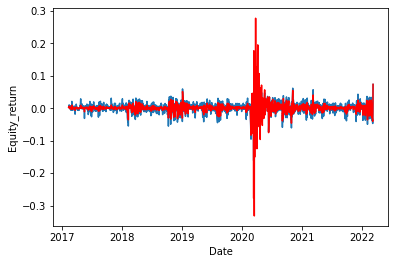

In [ ]:
# See how to add a legend.
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Equity_return', data=ds, ax=ax)
#ax2 = ax.twinx()
sns.lineplot(x='Date', y='Adjusted_Equity_return', data=ds, ax=ax, color='r')
plt.show()

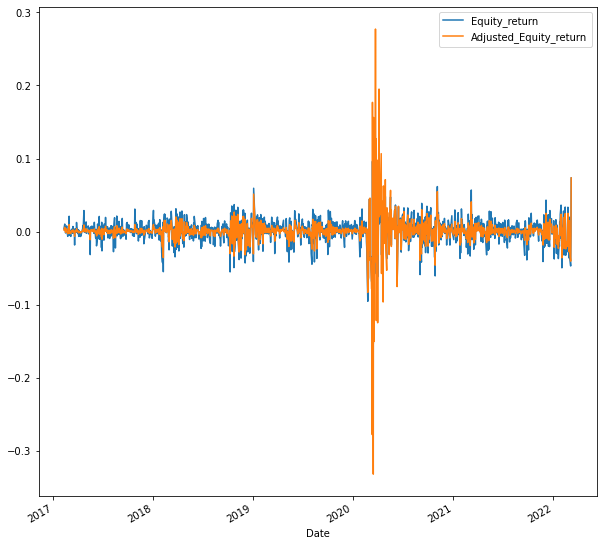

In [ ]:
ds.plot(x='Date', y=["Equity_return", "Adjusted_Equity_return"], kind="line", figsize=(10, 10))
plt.show()

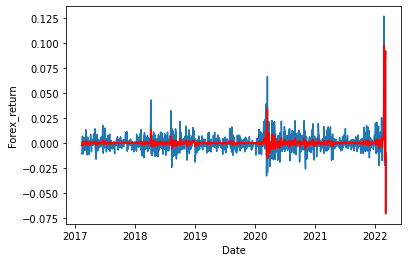

In [ ]:
# See how to add a legend.
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Forex_return', data=ds, ax=ax)
#ax2 = ax.twinx()
sns.lineplot(x='Date', y='Adjusted_Forex_return', data=ds, ax=ax, color='r')
plt.show()

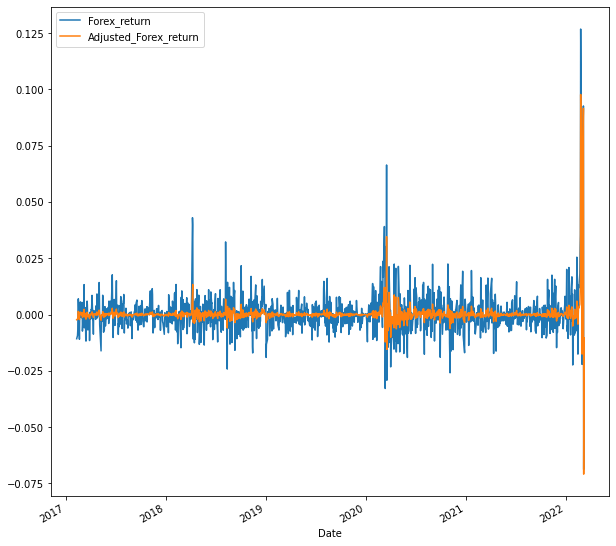

In [ ]:
ds.plot(x='Date', y=["Forex_return", "Adjusted_Forex_return"], kind="line", figsize=(10, 10))
plt.show()

In [ ]:
# We can see that the adjusted return is smoother that the normal return.

## Question 3:

In [ ]:
trading_days=250

In [ ]:
# The Annual volatility Nasdaq 100 is given by 

In [ ]:
Equity_Annual_vol_09 = np.sqrt(trading_days)*ds.loc[ds.shape[0]-1, 'Equity_Adjusted Volatility']

In [ ]:
Forex_Annual_vol_09 = np.sqrt(trading_days)*ds.loc[ds.shape[0]-1, 'Forex_Adjusted Volatility']

In [ ]:
Correlation_09 = ds.loc[ds.shape[0]-1, 'Correlation']

In [ ]:
a12 = Equity_Annual_vol_09*Forex_Annual_vol_09*Correlation_09
a11 = Equity_Annual_vol_09*Equity_Annual_vol_09
a22 = Forex_Annual_vol_09*Forex_Annual_vol_09

Annual_Covariance_Matrix_09 = np.matrix([[a11, a12], [a12, a22]])

In [ ]:
Annual_Covariance_Matrix_09

matrix([[ 0.2324032 , -0.11046743],
        [-0.11046743,  0.50122953]])

In [ ]:
np.matrix([1, 1])*Annual_Covariance_Matrix_09*(np.matrix([1, 1]).T)

matrix([[0.51269787]])

In [ ]:
# on the 23/02/2022, we have

In [ ]:
ds.tail()

,Date,DAX,NASDAQ100,EUR/RUB,USD/RUB,DAX_RUB,NASDAQ100_RUB,y_1t,y_2t,rt_EUR/RUB,...,Forex_return^2,Equity_Adjusted_Variance,Forex_Adjusted_Variance,Equity_Adjusted Volatility,Forex_Adjusted Volatility,Return_Product,Covariance,Correlation,Adjusted_Equity_return,Adjusted_Forex_return
1229,2022-03-03,13698.40,14035.21,117.6000,109.8960,1.610932e+06,1.542413e+06,-0.021786,-0.014745,0.018885,...,0.002238,0.000538,0.001321,0.023188,0.036351,-0.001206,-0.000018,-0.021537,-0.019381,0.038406
1230,2022-03-04,13094.54,13837.83,118.9925,122.5375,1.558152e+06,1.695653e+06,-0.045084,-0.014163,0.011771,...,0.004905,0.000588,0.001536,0.024243,0.039197,-0.002594,-0.000089,-0.094079,-0.029452,0.061311
1231,2022-03-07,12834.65,13319.38,118.9925,143.0000,1.527227e+06,1.904671e+06,-0.020047,-0.038186,0.000000,...,0.008585,0.000685,0.001959,0.026182,0.044264,-0.004363,-0.000240,-0.206822,-0.040431,0.091597
1232,2022-03-08,12831.51,13267.61,118.9925,127.5000,1.526853e+06,1.691620e+06,-0.000245,-0.003894,0.000000,...,0.004739,0.000645,0.002126,0.025402,0.046110,0.000266,-0.000487,-0.415843,-0.003221,-0.070887
1233,2022-03-09,13847.93,13742.20,127.0000,120.0000,1.758687e+06,1.649064e+06,0.076232,0.035146,0.065127,...,0.000107,0.000930,0.002005,0.030490,0.044776,-0.000758,-0.000442,-0.323664,0.073380,-0.010324


In [ ]:
ds[ds['Date'] == '2022-02-23']['Equity_Adjusted Volatility']

1223    0.022511
Name: Equity_Adjusted Volatility, dtype: float64

In [ ]:
Equity_Annual_vol_23 = np.sqrt(trading_days)*ds[ds['Date'] == '2022-02-23']['Equity_Adjusted Volatility'].values[0]
Forex_Annual_vol_23 = np.sqrt(trading_days)*ds[ds['Date'] == '2022-02-23']['Forex_Adjusted Volatility'].values[0]

In [ ]:
Correlation_23 = ds[ds['Date'] == '2022-02-23']['Correlation'].values[0]

In [ ]:
a12 = Equity_Annual_vol_23*Forex_Annual_vol_23*Correlation_23
a11 = Equity_Annual_vol_23*Equity_Annual_vol_23
a22 = Forex_Annual_vol_23*Forex_Annual_vol_23

Annual_Covariance_Matrix_23 = np.matrix([[a11, a12], [a12, a22]])

In [ ]:
Annual_Covariance_Matrix_23

matrix([[ 0.12668919, -0.03878085],
        [-0.03878085,  0.0438899 ]])

In [ ]:
# The variance went up after the war started.

In [ ]:
# We consider that the thetas are equal to 1.
# We can then calculate.
np.matrix([1, 1])*Annual_Covariance_Matrix_23*(np.matrix([1, 1]).T)

matrix([[0.0930174]])

# Part 3:

## Question 1:

In [ ]:
alpha = 0.01

In [ ]:
h_1 = 1
h_10 = 10

In [ ]:
ds.columns

Index(['Date', 'DAX', 'NASDAQ100', 'EUR/RUB', 'USD/RUB', 'DAX_RUB',
       'NASDAQ100_RUB', 'y_1t', 'y_2t', 'rt_EUR/RUB', 'rt_USD/RUB',
       'Forex_return', 'Equity_return', 'rt_RUB', 'Equity_return^2',
       'Forex_return^2', 'Equity_Adjusted_Variance', 'Forex_Adjusted_Variance',
       'Equity_Adjusted Volatility', 'Forex_Adjusted Volatility',
       'Return_Product', 'Covariance', 'Correlation', 'Adjusted_Equity_return',
       'Adjusted_Forex_return'],
      dtype='object')

In [ ]:
# The Normal Parametric Systematic Var for the portfolio is given by:
from scipy.stats import norm

# The one day Var is equal to on the 09/03/2022.
np.sqrt(h_1/trading_days)*norm.ppf(1- alpha)*np.asarray(np.matrix([1, 1])*Annual_Covariance_Matrix_09*(np.matrix([1, 1]).T))[0][0]

0.07543383159531893

In [ ]:
# The one day Var is equal to on the 23/02/2022.
np.sqrt(h_1/trading_days)*norm.ppf(1- alpha)*np.asarray(np.matrix([1, 1])*Annual_Covariance_Matrix_23*(np.matrix([1, 1]).T))[0][0]

0.013685757189292262

In [ ]:
# The 10 days Var on the 09/03/2022 is equal to.
np.sqrt(h_10/trading_days)*norm.ppf(1- alpha)*np.asarray(np.matrix([1, 1])*Annual_Covariance_Matrix_09*(np.matrix([1, 1]).T))[0][0]

0.23854272047478073

In [ ]:
# The 10 days Var is equal to on the 23/02/2022.
np.sqrt(h_10/trading_days)*norm.ppf(1- alpha)*np.asarray(np.matrix([1, 1])*Annual_Covariance_Matrix_23*(np.matrix([1, 1]).T))[0][0]

0.043278164222187714

## Question 2:

In [ ]:
# Estimate the 10-day Normal Stand-Alone VaR for the equity and forex risk factors on 23/02/2022.
# Comment.

np.sqrt(h_10/trading_days)*norm.ppf(1- alpha)*Equity_Annual_vol_23

0.1656053760422725

In [ ]:
np.sqrt(h_10/trading_days)*norm.ppf(1- alpha)*Forex_Annual_vol_23

0.09747359082212391

In [ ]:
# Estimate the 10-days Normal stand-Alone var for the Equity and Forex risk factors on 09/03/2022.
# Comment.

np.sqrt(h_10/trading_days)*norm.ppf(1- alpha)*Equity_Annual_vol_09

0.22429815580504442

In [ ]:
np.sqrt(h_10/trading_days)*norm.ppf(1- alpha)*Forex_Annual_vol_09

0.3293995319329875

## Question 3:

In [ ]:
ds.columns

Index(['Date', 'DAX', 'NASDAQ100', 'EUR/RUB', 'USD/RUB', 'DAX_RUB',
       'NASDAQ100_RUB', 'y_1t', 'y_2t', 'rt_EUR/RUB', 'rt_USD/RUB',
       'Forex_return', 'Equity_return', 'rt_RUB', 'Equity_return^2',
       'Forex_return^2', 'Equity_Adjusted_Variance', 'Forex_Adjusted_Variance',
       'Equity_Adjusted Volatility', 'Forex_Adjusted Volatility',
       'Return_Product', 'Covariance', 'Correlation', 'Adjusted_Equity_return',
       'Adjusted_Forex_return'],
      dtype='object')

In [ ]:
ds['rt_RUB'].quantile(q=1-alpha)

0.04764797734286214

In [ ]:
ds[]

In [ ]:
# on the 09/03/2022

In [ ]:
ds['rt_RUB^2'] = ds['rt_RUB']*ds['rt_RUB'] 

In [ ]:
ds['Return_Adjusted_Variance'] = 0
ds['Return_Adjusted_Variance'].iloc[0] = ds['rt_RUB^2'].mean()

In [ ]:
for i in range(1,ds.shape[0]):
    ds.loc[i, 'Return_Adjusted_Variance'] = (1-lbd)*ds.loc[i, 'rt_RUB^2'] + lbd*ds.loc[i-1, 'Return_Adjusted_Variance']

In [ ]:
ds['Return_Adjusted Volatility'] = np.sqrt(ds['Return_Adjusted_Variance'])

In [ ]:
# The adjusted return.

ds['Adjusted_return_09'] = ds['rt_RUB'] \
                *(ds['Return_Adjusted Volatility']/ds.loc[ds.shape[0]-1, 'Return_Adjusted Volatility'])

In [ ]:
ds['Adjusted_return_09'].quantile(q=1-alpha)

0.029448352567007983

In [ ]:
# On 23/02/2022

In [ ]:
ds['Adjusted_return_23'] = ds['rt_RUB']*(ds['Return_Adjusted Volatility']/(ds[ds['Date'] == '2022-02-23']['Return_Adjusted Volatility'].values[0]))

In [ ]:
ds['Adjusted_return_23'].quantile(q=1-alpha)

0.07734577980686666

<AxesSubplot:>

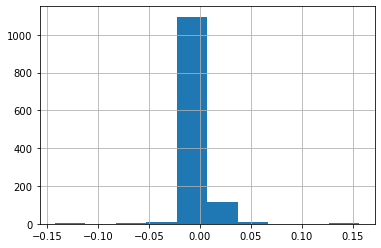

In [ ]:
ds['Adjusted_return_09'].hist()

<AxesSubplot:xlabel='Adjusted_return_23', ylabel='Count'>

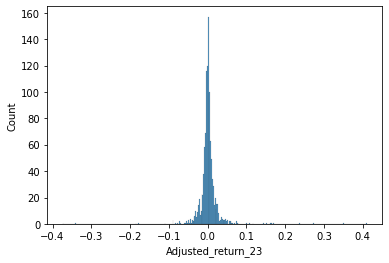

In [ ]:
sns.histplot(data=ds, x='Adjusted_return_23')